In [10]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [6]:
# datasets de pré-processamento carregados
x_train = np.load('dataset/x_train.npy').astype(np.float32)
y_train = np.load('dataset/y_train.npy').astype(np.float32)
x_val = np.load('dataset/x_val.npy').astype(np.float32)
y_val = np.load('dataset/y_val.npy').astype(np.float32)

In [7]:
# data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
    x=x_train, y=y_train,
    batch_size=32,
    shuffle=True
)

val_generator = val_datagen.flow(
    x=x_val, y=y_val,
    batch_size=32,
    shuffle=False
)

In [8]:
inputs = Input(shape=(26, 34, 1))

net = Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu')(inputs)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = MaxPooling2D(pool_size=2)(net)

net = Flatten()(net)

net = Dense(512)(net)
net = Activation('relu')(net)
net = Dense(1)(net)
outputs = Activation('sigmoid')(net)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 26, 34, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 34, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 17, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 17, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 8, 128)         73856 

2022-01-09 10:40:57.923264: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-09 10:40:57.923298: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-09 10:40:57.923325: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (guilherme-Aspire-E5-574): /proc/driver/nvidia/version does not exist
2022-01-09 10:40:57.923570: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

model.fit(
    train_generator, epochs=50, validation_data=val_generator,
    callbacks=[
        ModelCheckpoint('models/%s.h5' % (start_time), monitor='val_acc', save_best_only=True, mode='max', verbose=1),
        ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=10, verbose=1, mode='auto', min_lr=1e-05)
    ]
)

Epoch 1/50
63/63 [==============================] - ETA: 0s - loss: 0.5278 - acc: 0.7151
Epoch 00001: val_acc improved from -inf to 0.82966, saving model to models/2022_01_09_11_02_24.h5
63/63 [==============================] - 4s 48ms/step - loss: 0.5278 - acc: 0.7151 - val_loss: 0.3864 - val_acc: 0.8297 - lr: 0.0010
Epoch 2/50
63/63 [==============================] - ETA: 0s - loss: 0.3185 - acc: 0.8672
Epoch 00002: val_acc improved from 0.82966 to 0.88181, saving model to models/2022_01_09_11_02_24.h5
63/63 [==============================] - 3s 45ms/step - loss: 0.3185 - acc: 0.8672 - val_loss: 0.2683 - val_acc: 0.8818 - lr: 0.0010
Epoch 3/50
63/63 [==============================] - ETA: 0s - loss: 0.2371 - acc: 0.9035
Epoch 00003: val_acc improved from 0.88181 to 0.94322, saving model to models/2022_01_09_11_02_24.h5
63/63 [==============================] - 3s 48ms/step - loss: 0.2371 - acc: 0.9035 - val_loss: 0.1530 - val_acc: 0.9432 - lr: 0.0010
Epoch 4/50
63/63 [================

Epoch 29/50
62/63 [============================>.] - ETA: 0s - loss: 0.0172 - acc: 0.9944
Epoch 00029: val_acc did not improve from 0.99652
63/63 [==============================] - 3s 47ms/step - loss: 0.0175 - acc: 0.9940 - val_loss: 0.0260 - val_acc: 0.9896 - lr: 0.0010
Epoch 30/50
62/63 [============================>.] - ETA: 0s - loss: 0.0445 - acc: 0.9818
Epoch 00030: val_acc did not improve from 0.99652
63/63 [==============================] - 3s 45ms/step - loss: 0.0439 - acc: 0.9821 - val_loss: 0.0182 - val_acc: 0.9942 - lr: 0.0010
Epoch 31/50
63/63 [==============================] - ETA: 0s - loss: 0.0221 - acc: 0.9935
Epoch 00031: val_acc did not improve from 0.99652
63/63 [==============================] - 3s 44ms/step - loss: 0.0221 - acc: 0.9935 - val_loss: 0.0295 - val_acc: 0.9919 - lr: 0.0010
Epoch 32/50
63/63 [==============================] - ETA: 0s - loss: 0.0184 - acc: 0.9940
Epoch 00032: val_acc did not improve from 0.99652
63/63 [==============================] - 

test acc: 0.9976825028968713


/tmp/ipykernel_12695/2331932957.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred_logical = (y_pred > 0.5).astype(np.int)


<AxesSubplot:>

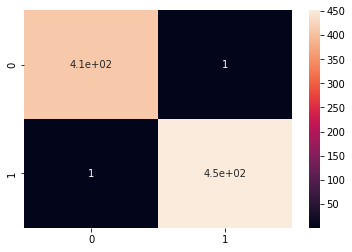

In [11]:
model = load_model('models/%s.h5' % (start_time))

y_pred = model.predict(x_val/255.)
y_pred_logical = (y_pred > 0.5).astype(np.int)

print ('test acc: %s' % accuracy_score(y_val, y_pred_logical))
cm = confusion_matrix(y_val, y_pred_logical)
sns.heatmap(cm, annot=True)

/home/guilherme/Documentos/.virtualenvs/tcc-env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


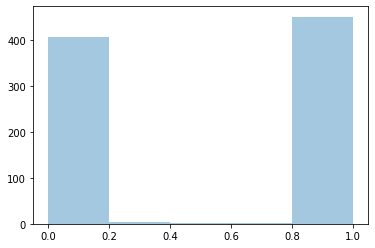

In [12]:
ax = sns.distplot(y_pred, kde=False)